# Titanic Passenger Survival Prediction

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt             

## 1.  DATA LOADING AND INITIAL EXPLORATION


● Are data accessible?


○ Existence: the dataset is available in an Excel format.

○ Access to the data: it has been downloaded from Kaggle, a well-known platform for machine-learning datasets

○ Availability: the data has been provided by the professor, so there is no need to generate it.

○ Copyright, Legal permission, anonymity, or redistribution: the dataset license is unknown, its legal status for redistribution and commercialization is unclear. However, since this project is for academic purposes it should be acceptable.

○ Issues of privacy or confidentiality: passengers' information is publicly available over historical records so there are no confidentiality issues.

○ Generation rate: direct or by proxy (e.g., labelers, 3rd party providers): the source is unknown, there has not been updates for 5 years so it might be incomplete or out-of-date.

● Rules of thumb to estimate the number of training examples needed for a problem:
○ 10 times the amount of features (often exaggerates the training set size, works as an upper bound)
○ 100 or 1000 times the number of classes (often underestimates the size)
○ 10 times the number of trainable parameters (usually applied to neural networks).

● Do we know whether data are reliable? Can we trust the labels?
○ We can perform (manual, automated) validation of quality on a subset of the data.
○ Are labels delayed? We observe labels now but use them to predict far future events.
○ Are labels indirect? Indicates a weak correlation with the prediction target (e.g., page interest)

### OVERVIEW

Dependent Variable: Survived
Independent variables: name, sex, age, sibsp, parch, ticket, fate, cabin, embarked, boat, body, home.dest

In [163]:
df = pd.read_excel('titanic3.xls')
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [105]:
df.tail(5) 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [106]:
df.shape

(1309, 14)

In [107]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [155]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape) 

number of duplicate rows:  (0, 14)


In [156]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        939
fare          281
cabin         186
embarked        3
boat           28
body          121
home.dest     369
dtype: int64

### VISUALIZATIONS AND EXPLORATORY STATISTICS

#### Data Leakage
"Boat" and "Body" features are direct indicators of survival or not, which are inherently tied to the prediction target. 

The "Boat" feature indicates whether a passenger was placed on a lifeboat, which is only relevant for survivors. Including this feature would give the model access to the outcome (survival) during training, causing data leakage.

The "Body" feature refers to the body number, which is assigned to passengers who did not survive, revealing the passenger has passed away. Including this feature would directly reveal the outcome (not surviving), again leading to data leakage. 

By eliminating these features directly from the dataset we prevent data leakage, which occurs when the prediction target is implicitly contained in the training dataset. This would lead to an overly optimistic performance and a model that would not be capable of generalizing to unseen data.

In [108]:
df = df.drop(['body', 'boat'], axis=1)
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [109]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


#### Plots

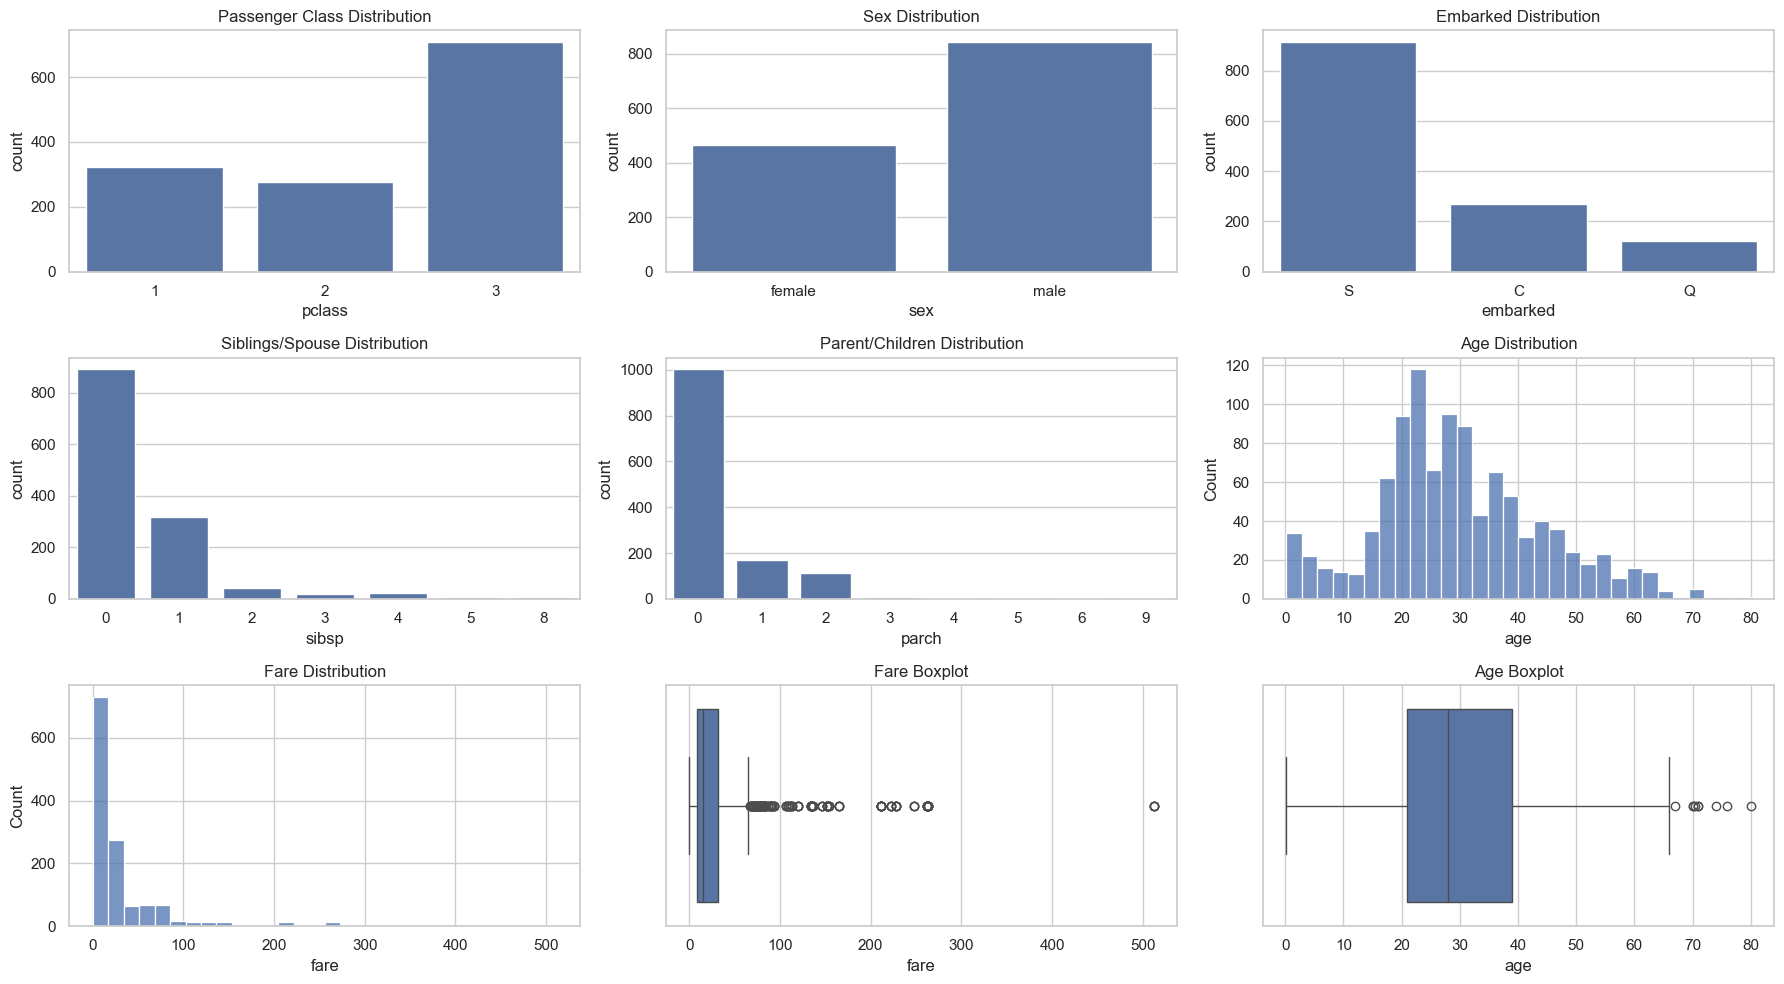

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

# Distribution Pclass
sns.countplot(x='pclass', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Passenger Class Distribution')

# Distribution Sex
sns.countplot(x='sex', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Sex Distribution')

# Distribution Embarked
sns.countplot(x='embarked', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Embarked Distribution')

#Distribution siblings/spouses
sns.countplot(x='sibsp', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Siblings/Spouse Distribution')

#Distribution parent/children
sns.countplot(x='parch', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Parent/Children Distribution')

# Distribution Age
sns.histplot(df['age'].dropna(), bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Age Distribution')

# Distribution Fare
sns.histplot(df['fare'].dropna(), bins=30, ax=axes[2, 0])
axes[2, 0].set_title('Fare Distribution')

# Box plot Fare
sns.boxplot(x='fare', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Fare Boxplot')

# Box plot Age
sns.boxplot(x='age', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Age Boxplot')

plt.tight_layout()
plt.show()


COMPARISONS BETWEEN INDEPENDENT VARIABLES AND DEPENDENT VARIABLE

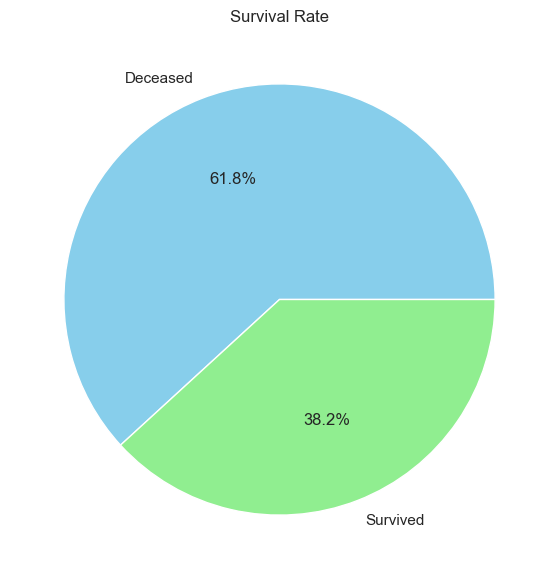

In [ ]:
survival_counts = df['survived'].value_counts()
data = survival_counts.values
labels = ['Deceased', 'Survived']

fig = plt.figure(figsize=(10, 7))
plt.title("Survival Rate")
plt.pie(data, labels=labels, autopct='%1.1f%%', colors = ['skyblue', 'lightgreen'])

plt.show()

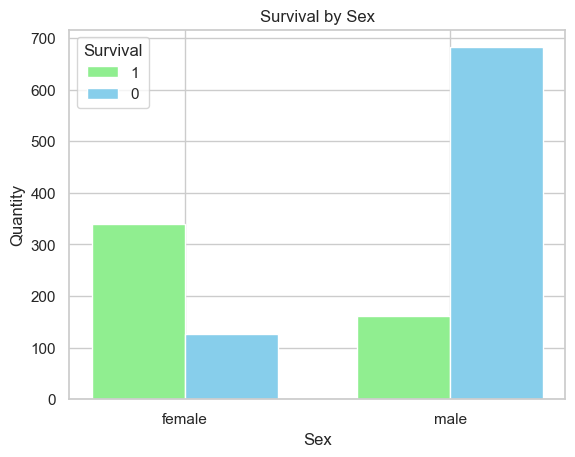

In [58]:
counts = df.groupby(['sex', 'survived']).size().unstack()
survived = counts[1]
deceased = counts[0]
bar_width = 0.35
x = np.arange(len(counts.index))

plt.bar(x - bar_width/2, survived, bar_width, label='1', color='lightgreen')
plt.bar(x + bar_width/2, deceased, bar_width, label='0', color='skyblue')

plt.xlabel('Sex')
plt.ylabel('Quantity')
plt.title('Survival by Sex')
plt.xticks(x, counts.index)
plt.legend(title='Survival')
plt.show()

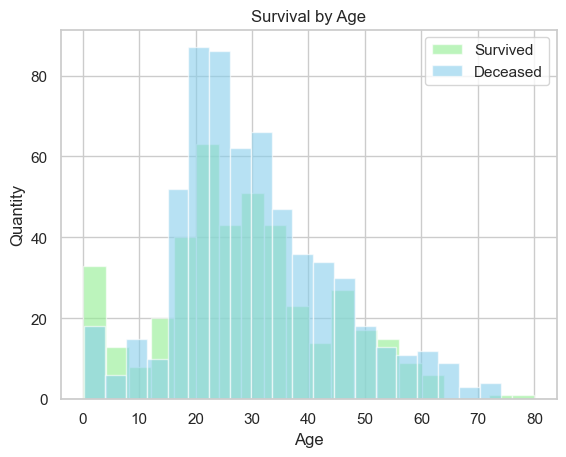

In [59]:
#Survived
plt.hist(df[df['survived'] == 1]['age'].dropna(), bins=20, alpha=0.6, label='Survived', color='lightgreen')

# Deceased
plt.hist(df[df['survived'] == 0]['age'].dropna(), bins=20, alpha=0.6, label='Deceased', color='skyblue')

plt.xlabel('Age')
plt.ylabel('Quantity')
plt.title('Survival by Age')
plt.legend()
plt.show()

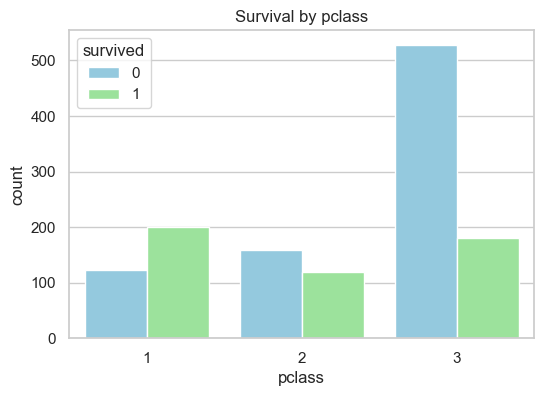

In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(x='pclass', hue='survived', data=df, palette = ['skyblue','lightgreen'])
plt.title('Survival by pclass')
plt.show()

Survivors by embarkation 

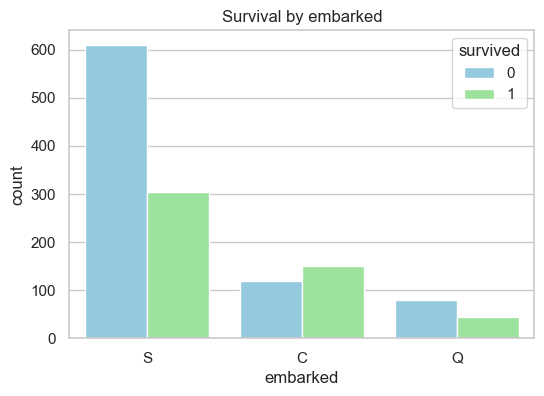

In [79]:
plt.figure(figsize=(6, 4))
sns.countplot(x='embarked', hue='survived', data=df, palette=['skyblue','lightgreen'])
plt.title('Survival by embarked')
plt.show()

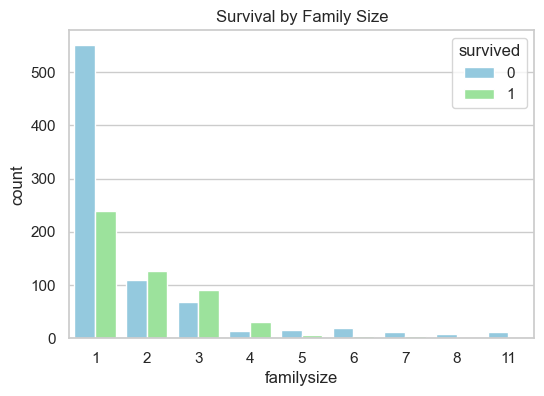

In [94]:
# Family Size vs. Survival

df['familysize'] = df['sibsp'] + df['parch'] + 1

plt.figure(figsize=(6, 4))
sns.countplot(x='familysize', hue='survived', data=df, palette=['skyblue','lightgreen'])
plt.title('Survival by Family Size')
plt.show()

/var/folders/_l/fwt_9dvs30g55rs94h95qn8w0000gn/T/ipykernel_64091/1136893654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='familysize', data=df, palette=['lightgreen'])


Text(0.5, 1.0, 'Family Size Box Plot')

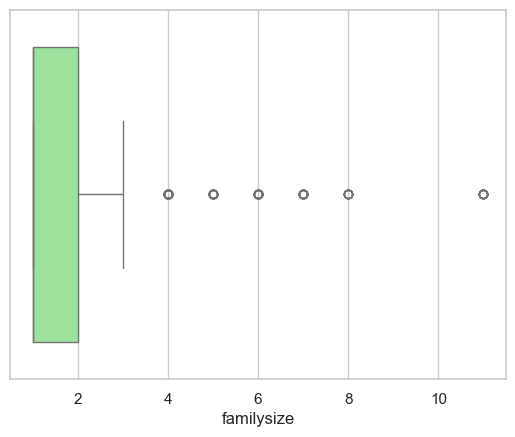

In [97]:
# Box plot Age
sns.boxplot(x='familysize', data=df, palette=['lightgreen'])
axes[2, 2].set_title('Family Size Box Plot')


## 7. FEATURE SELECTION

STATISTICS
For Categorical Variables: Chi-Square
Entre: home destination y survival

In [112]:
from scipy.stats import chi2_contingency

# Step 1: Handle missing values in 'home.dest' - there are 43% missing values of the total
df_subset = df.dropna(subset=['home.dest'])  

# Step 2: Create the contingency table
contingency_table = pd.crosstab(df_subset['survived'], df_subset['home.dest'])

# Step 3: Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 4: Print the results
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi2 Statistic: 453.5181628230581
P-value: 0.0015344854241560453
Degrees of Freedom: 368


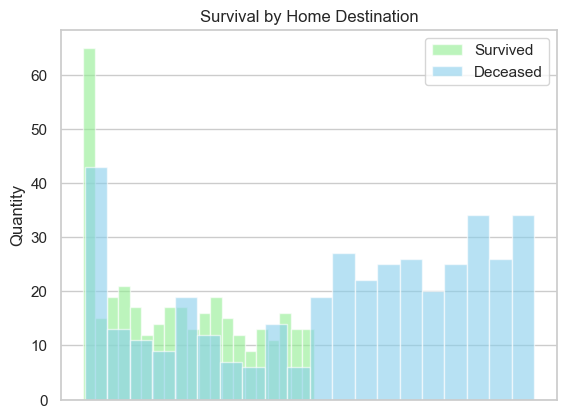

In [117]:
# Plot for survived passengers
plt.hist(df_subset[df_subset['survived'] == 1]['home.dest'].dropna(), bins=20, alpha=0.6, label='Survived', color='lightgreen')

# Plot for deceased passengers
plt.hist(df_subset[df_subset['survived'] == 0]['home.dest'].dropna(), bins=20, alpha=0.6, label='Deceased', color='skyblue')

# Adding labels and title
plt.xlabel('Home Destination')
plt.ylabel('Quantity')
plt.gca().xaxis.set_visible(False)
plt.title('Survival by Home Destination')
plt.legend()
plt.show()

Si bien tiene missing values (un 43% del total) al realizar el chi-square puedo observar un p-value de 0.001, indicating that the relationship between survived and home.dest is statistically significant.


CORRELATION BETWEEN TITLE AND SURVIVAL

7. FEATURE SELECTION Name:
No tiene valor predictivo: Los nombres son aleatorios y no tienen relación con la supervivencia. No contribuirán positivamente a un modelo.
Ruido: Mantenerla solo agregaría complejidad y ruido innecesario al modelo, ya que no está relacionada con los patrones de supervivencia.
Extraer informacion de Miss, Master, Mr., Mrs., Capt., Dr., Major., Mme., Lady., Sir., Col., Dona., Jonkheer

In [ ]:
def extract_title(name):
    title = name.split()[1].split('.')[0]
    return title

df['title'] = df['name'].apply(extract_title)
df = df.drop(['name'], axis=1)
df.head(5)


In [ ]:
df.tail(5)

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count) #no missing values for title

/var/folders/_l/fwt_9dvs30g55rs94h95qn8w0000gn/T/ipykernel_64091/3115139015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='title', data=df, palette=['lightgreen'])


Text(0.5, 1.0, 'Title Box Plot')

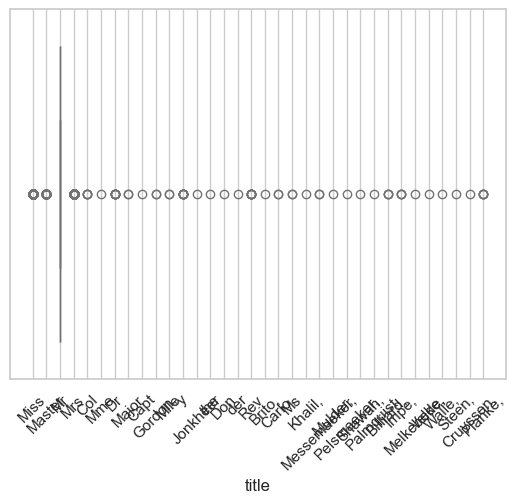

In [139]:

#boxplot of titles -> many rare ones, many outliers, group as others
#Since i had an error when computing the title vs survival I realized
# Box plot Age
sns.boxplot(x='title', data=df, palette=['lightgreen'])
plt.xticks(rotation = 45)
axes[2, 2].set_title('Title Box Plot')



In [130]:

title_counts = df['title'].value_counts()
print(title_counts)


title
Mr              736
Miss            256
Mrs             191
Master           59
y                 8
Rev               8
Dr                8
Planke,           4
Col               4
Impe,             3
Billiard,         3
Messemaeker,      2
Mlle              2
Major             2
Carlo,            2
Ms                2
Gordon,           2
Shawah,           1
Cruyssen,         1
Steen,            1
Walle,            1
Velde,            1
Melkebeke,        1
Palmquist,        1
Capt              1
Pelsmaeker,       1
Mulder,           1
Khalil,           1
Mme               1
der               1
Don               1
the               1
Jonkheer          1
Brito,            1
Name: count, dtype: int64


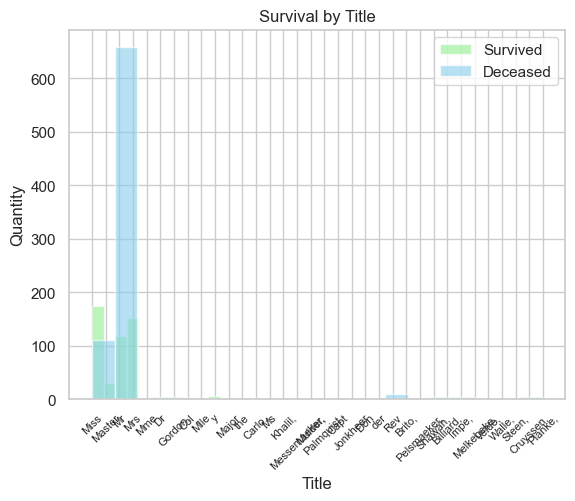

In [137]:
# Plot for survived passengers
plt.hist(df[df['survived'] == 1]['title'].dropna(), bins=20, alpha=0.6, label='Survived', color='lightgreen')

# Plot for deceased passengers
plt.hist(df[df['survived'] == 0]['title'].dropna(), bins=20, alpha=0.6, label='Deceased', color='skyblue')

# Adding labels and title
plt.xlabel('Title')
plt.ylabel('Quantity')
plt.title('Survival by Title')
plt.legend()
plt.xticks(rotation = 45, fontsize=8)
plt.show()

Outliers 

In [ ]:
# ESTO SOLO SE HACE SI LA DATA ESTA NORMALLY DISTRIBUTED
# IQR
Q1 = title_counts.quantile(0.25)
Q3 = title_counts.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as titles with frequencies below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outlier_threshold_lower = Q1 - 1.5 * IQR
outlier_threshold_upper = Q3 + 1.5 * IQR

# Get outliers based on frequency
outliers = title_counts[(title_counts < outlier_threshold_lower) | (title_counts > outlier_threshold_upper)]

print(outliers)

for i in range(len(df)): 
    if df['title'][i] not in outliers.index:
        df['title'][i] = 'Others'

print(df['title'].value_counts())

title
Mr        736
Miss      256
Mrs       191
Master     59
y           8
Rev         8
Dr          8
Name: count, dtype: int64
title
Mr        736
Miss      256
Mrs       191
Master     59
Others     43
Dr          8
y           8
Rev         8
Name: count, dtype: int64


/var/folders/_l/fwt_9dvs30g55rs94h95qn8w0000gn/T/ipykernel_64091/2443480360.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['title'][i] = 'Others'
/var/folders/_l/fwt_9dvs30g55rs94h95qn8w0000gn/T/ipykernel_64091/2443480360.py:17: Set

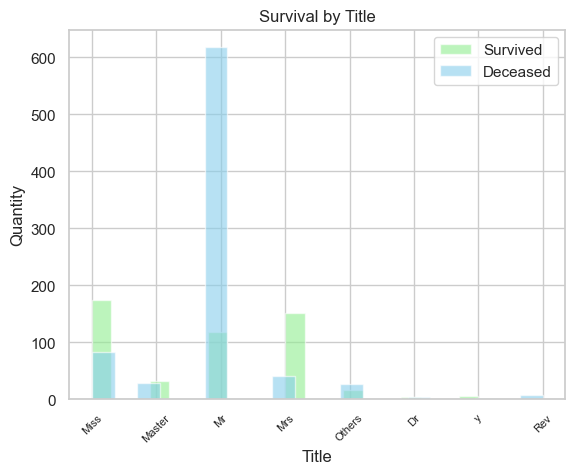

In [145]:
# Plot for survived passengers
plt.hist(df[df['survived'] == 1]['title'].dropna(), bins=20, alpha=0.6, label='Survived', color='lightgreen')

# Plot for deceased passengers
plt.hist(df[df['survived'] == 0]['title'].dropna(), bins=20, alpha=0.6, label='Deceased', color='skyblue')

# Adding labels and title
plt.xlabel('Title')
plt.ylabel('Quantity')
plt.title('Survival by Title')
plt.legend()
plt.xticks(rotation = 45, fontsize=8)
plt.show()

In [147]:
contingency_table = pd.crosstab(df['survived'], df['title'])

# Step 3: Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 4: Print the results
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi2 Statistic: 399.5321126143737
P-value: 3.005203054625194e-82


Extremely low -> PREDICTS A LOT -> NO DROPPING 
AND NO MISSING VALUES!

Perform basic exploratory data analysis (EDA) to comprehend the structure and characteristics of the data.
Note: Your analysis should include appropriate exploratory statistics and visualizations

1. Correlation: You can check how strongly each numerical feature correlates with the dependent variable. 
Features with a higher correlation to the target (either positive or negative) are likely more predictive.
CORRELATION MATRIX FOR NUMERICAL FEATURES
A higher positive correlation with the target means the feature is more likely to be useful for predicting survival.
A negative correlation means the feature decreases the likelihood of survival.
A low correlation indicates the feature may not be useful for prediction.

3. Statistical Tests (for Each Feature)
You can perform different statistical tests for numerical and categorical features to see if they have a significant relationship with the target variable Survived.
For Categorical Features (Chi-square Test)
For categorical features (like Sex, Pclass, Embarked), you can use the Chi-square test to evaluate the independence of the feature and the target variable.

If the p-value is less than 0.05, you can conclude that there is a significant relationship between the feature and the target variable at a 95% confidence level. This means the feature is useful for prediction.
A high p-value (greater than 0.05) suggests no significant relationship.


For Numerical Features (T-test or Correlation)
For numerical features (like Age, Fare), you can use:

T-test (for comparing means between two groups, i.e., survived vs. not survived).
Pearson’s correlation coefficient (for linear relationship with the target).

The T-test is typically used when you have one categorical variable with two levels (groups) and one continuous variable.
The Pearson correlation is used when both variables are continuous (e.g., age, fare) and you want to assess how one changes as the other changes.

TICKET NUMBER AND SURVIVAL
HEATMAP


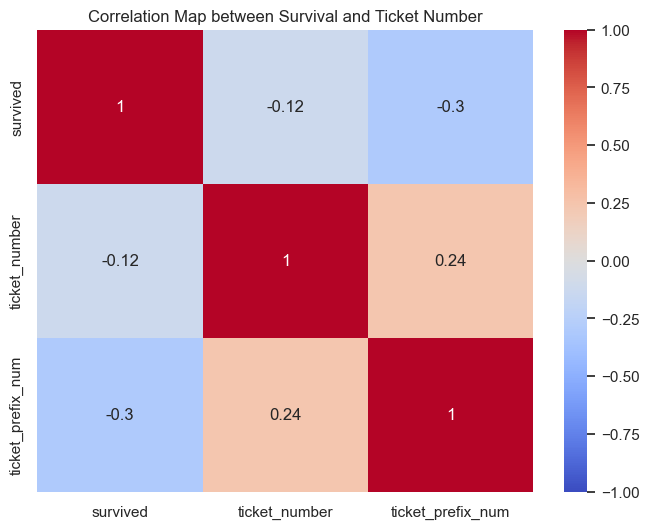

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract the numeric part of the ticket number
# Create a new column that only contains the numeric part of the ticket
df['ticket_number'] = df['ticket'].str.extract('(\d+)').astype(float)

# Step 2: Optional - Convert ticket prefixes (letters) into numeric values
# Create a new column that extracts the prefix part of the ticket
df['ticket_prefix'] = df['ticket'].str.extract('([A-Za-z]+)')[0]

# Map each unique prefix to a unique number
prefix_mapping = {prefix: idx for idx, prefix in enumerate(df['ticket_prefix'].dropna().unique())}
df['ticket_prefix_num'] = df['ticket_prefix'].map(prefix_mapping)

# Step 3: Calculate correlation between Survival and Ticket Number
correlation_data = df[['survived', 'ticket_number', 'ticket_prefix_num']]

# Step 4: Plot the correlation map
# We will use the `corr()` function to get correlations and then plot them as a heatmap
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Map between Survival and Ticket Number')
plt.show()



You can use a chi-square test of independence when you have two categorical variables. It allows you to test whether the two variables are related to each other. 
If two variables are independent (unrelated), the probability of belonging to a certain group of one variable isn't affected by the other variable.

In [ ]:
# 7. Correlation Heatmap for Numerical Features
# Create a correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
#Cabin: misssing values 
#What is parch?, sibsp?


#Family number: sum parch and sibsp

#COLUMNS TO DROP:
#Boat -> NaN -> Tiene valor si sobrevivieron -> DATA LEARKAGE DROP!!!
#Survived
#Body: Number if survived -> DROP 

#home.dset -> NaN
#

## 2. MISSING VALUES

Detail 
why you selected a particular method to handle missing values, 

Que factores determinan si un pasajero tiene mas probabilidades de sobrevivir?
por ejemplo si esta solo o si tiene familia


whether you opted toremove a column from the dataset and the reasoning behind this decision
why a particular feature engineering technique was utilized, 
anticipated effect of your feature engineering on the models that could be used to address the stated problem.

Chequear sobre logistic regression ya que ese es el modelo que se va a usar. 
que es mejor para logistic regression?



Effectively managing missing values: determining when to drop versus when to impute.
•Understanding the rationale for feature engineering: recognizing why certain features should be removed or
transformed.
•Correctly balancing the dataset: weighing the trade-offs of oversampling versus undersampling.
•Selecting features beyond correlation: employing automated selection techniques


Missing values fo fare, cabin, embarked, boat, body, home.dest

Fare: average
Body: information found after prediction -> DATA LEAKAGE
Boat: after data leakage


imputation, deletion, or flagging

In [63]:
df.count() 

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [148]:
missing_val = df.isnull().sum()
missing_percentage = round((missing_val/len(df)) * 100, 2)
table = pd.DataFrame({'Missing Values': missing_val, 'Missing Percentage': missing_percentage})

print(table)

           Missing Values  Missing Percentage
pclass                  0                0.00
survived                0                0.00
sex                     0                0.00
age                   263               20.09
sibsp                   0                0.00
parch                   0                0.00
ticket                  0                0.00
fare                    1                0.08
cabin                1014               77.46
embarked                2                0.15
home.dest             564               43.09
title                   0                0.00


#### a. Cabin

Since Cabin has 77.46% of missing values there is no point in including it 
ademas cabin es el numero de camarote que si bien podria haber influenciado ejemplo un piso contiene una habitacion suite y otra mas barata, esa informacion no se pierde completamente porque esta en el fare.

ALSO 
Tickets are not unique -> where they sold by cabin? YES
people in the same cabin have the same ticket number

no hay un ticket con una cabin y otra sin como para poder rellenar los valores que faltan
no tiene sentido ni usar la moda ni median ni nada de eso ya que son cuartos que van a haber 100 personas por cuarto?


Le ponemos 'Unknown' -> cabinas pueden estar mas arriba o abajo



In [165]:
df['cabin'] = df['cabin'].fillna('Unknown')

In [167]:
df.head(12)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,Unknown,C,NaN,22.0,"Montevideo, Uruguay"


#### b. Embarked

In [162]:
missing_embarked = df[df["embarked"].isnull()]
print(missing_embarked)

     pclass  survived                                       name     sex  \
168       1         1                        Icard, Miss. Amelie  female   
284       1         1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      age  sibsp  parch  ticket  fare cabin embarked boat  body  \
168  38.0      0      0  113572  80.0   B28      NaN    6   NaN   
284  62.0      0      0  113572  80.0   B28      NaN    6   NaN   

          home.dest  
168             NaN  
284  Cincinatti, OH  


Mode -> categorical
no podemos usar mean ni median

In [168]:
mode_embarked = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(mode_embarked)

In [170]:
print(df.loc[[168]])

     pclass  survived                 name     sex   age  sibsp  parch  \
168       1         1  Icard, Miss. Amelie  female  38.0      0      0   

     ticket  fare cabin embarked boat  body home.dest  
168  113572  80.0   B28        S    6   NaN       NaN  


In [171]:
print(df.loc[[168]])

     pclass  survived                 name     sex   age  sibsp  parch  \
168       1         1  Icard, Miss. Amelie  female  38.0      0      0   

     ticket  fare cabin embarked boat  body home.dest  
168  113572  80.0   B28        S    6   NaN       NaN  


#### c. Age

Age-> mean porque la distribucion no es exactamente central 

In [172]:
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

#### d. Fare

since the distribution is very left skewed we are going to use the median

In [177]:
median_fare = df['fare'].median()
df['fare'] = df['fare'].fillna(median_fare)


In [178]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

Learning Curves

● Practical way to determine whether we have enough training data.

● Curves: training and validation scores (y) for a number of examples (x)

● Diminishing return for the number of examples added (data cost!)

● Typical sublinear improvement of ML training performance.

● Reasons for the plateau:

○ Not enough informative features

○ Learning algorithm cannot train a complex enough model for the given data

● How to break the plateau:

○ Engineering additional features, e.g., combining existing features or adding indirect information

○ More powerful learning algorithms, e.g., ensemble learning or deep neural networks

## 3. Encoding Categorical Variables

## 4. Feature scaling 

standardization

5. Split 

Splitting data: 
● Rules of thumb to estimate the number of training examples needed for a problem:
○ 10 times the amount of features (often exaggerates the training set size, works as an upper bound)
○ 100 or 1000 times the number of classes (often underestimates the size)
○ 10 times the number of trainable parameters (usually applied to neural networks).